### 任务：
基于usa_housing_price.csv数据，建立线性回归模型，预测合理房价：
1. 以面积为输入变量，建立一元模型，评估模型表现，可视化线性回归预测结果
2. 以income，house age，numbers of rooms，population，size为输入变量，建立多元模型，评估模型表现
3. 预测income=65000，house age=5，numbers of rooms=5，population=30000，size=200的合理房价

### 评估指标：
MSE、R square

In [1]:
# 控制以允许JupyterNotebook多个输出
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path = './datasets/02/usa_housing_price.csv'

In [3]:
data = pd.read_csv(path)
data.head()
data.shape

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population,size,Price
0,79545.45857,5.317139,7.009188,23086.80050,188.214212,1.059034e+06
1,79248.64245,4.997100,6.730821,40173.07217,160.042526,1.505891e+06
2,61287.06718,5.134110,8.512727,36882.15940,227.273544,1.058988e+06
3,63345.24005,3.811764,5.586729,34310.24283,164.816630,1.260617e+06
4,59982.19723,5.959445,7.839388,26354.10947,161.966659,6.309435e+05


(5000, 6)

### 任务 1

In [4]:
data = np.array(data)
X = data[:, 4].reshape(-1, 1)
y = data[:, 5]
X.shape
y.shape

(5000, 1)

(5000,)

In [5]:
X[:5]
y[:5]

array([[188.2142121],
       [160.0425258],
       [227.2735445],
       [164.8166303],
       [161.9666587]])

array([1059033.558 , 1505890.915 , 1058987.988 , 1260616.807 ,
        630943.4893])

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2021)
X_train.shape
X_test.shape
y_train.shape
y_test.shape

(3750, 1)

(1250, 1)

(3750,)

(1250,)

In [7]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
lin_reg.coef_
lin_reg.intercept_

array([3888.46479823])

548448.4597103426

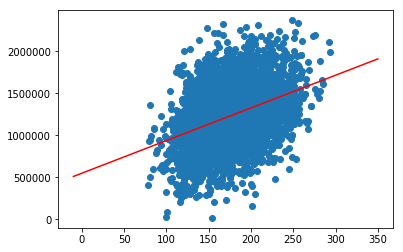

In [9]:
plt.scatter(X_train, y_train)
x_plot = np.linspace(-10, 350, 100)
y_plot = [lin_reg.coef_ * i + lin_reg.intercept_ for i in x_plot]
plt.plot(x_plot, y_plot, color='r')
plt.show()

In [10]:
lin_reg.score(X_test, y_test)

0.08653639794640877

In [11]:
from sklearn.metrics import mean_squared_error, r2_score

y_predict = lin_reg.predict(X_test)
mean_squared_error(y_test, y_predict)
r2_score(y_test, y_predict)

103765701973.07408

0.08653639794640877

### 任务 2

In [12]:
data = np.array(data)
X = data[:, :5]
y = data[:, 5]
X.shape
y.shape

(5000, 5)

(5000,)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2021)
X_train.shape
y_train.shape
X_test.shape
y_test.shape

(3750, 5)

(3750,)

(1250, 5)

(1250,)

In [14]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
lin_reg.score(X_test, y_test)

0.9098098892212337

In [16]:
y_predict = lin_reg.predict(X_test)
mean_squared_error(y_test, y_predict)
r2_score(y_test, y_predict)

10245225025.87787

0.9098098892212337

### 任务 3

In [18]:
x_predict = np.array([65000, 5, 5, 30000, 200]).reshape(1, -1)
y_predict = lin_reg.predict(x_predict)
y_predict

array([821571.88295056])